<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto II de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">BRIC - EDA</font></h1>
<hr>

In [1]:
#@title Identificação

#@markdown Turma
Turma = '6Q11' #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Matheus Hideki Aoyanagi Maraccini - 4151955-8' #@param {type:"string"}
Aluno2 = '' #@param {type:"string"}
Aluno3 = '' #@param {type:"string"}
Aluno4 = '' #@param {type:"string"}



# Problema 
  
Nosso estudo tem foco o BRIC: Brasil, Rússia, Índia e China.
O BRIC é um conjunto de países emergentes que estão em rápida expansão econômica nas últimas décadas.
Nossa principal variável a ser estuda é o GDP/pessoa – que nada mais é que o PIB divido por pessoa - normalizado pela inflação e fixado em USD.
Além disso, escolhemos mais 7 variáveis que são ligadas a qualidade de vida, educação, e saúde e também a emissão de CO2 para nos ajudar entender o comportamento do GDP em relação a população e ao crescimento sustentável


# Descrição e origem dos dados 
Nossos Dados advêm do Gapminder, que possui um banco de dados robusto sobre indicadores de diversos países – com ênfase principalmente em padrões de vida e economia.
Realizamos os downloads dos 8 arquivos em CSV pelo próprio site do Gapminder e fizemos o upload em um GITHUB (https://github.com/hidekiaoyanagi/mack_trabalho) público para obtenção desses dados na nuvem.

Dado a natureza dos dados e as segmentações realizadas para chegar em um Dataframe final que abarcasse todos os indicadores.
Foram realizadas diversas etapas de tratamento de dados e junção de dataframes antes do início da análise exploratória dos dados.








# Aquisição dos Dados

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais  reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis). 





In [2]:
# Importando bibiliotecas para EDA
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline


In [3]:
#Funções criadas para serem utilizadas nesse trabalho
#Conversor de Valor + String para Valor multiplicado pelo equivalente da string
def convert(valor):
    if valor:
        # determine o multiplicador
        multiplier = 1
        if valor.endswith('k'):
            multiplier = 1000
            valor = valor[0:len(valor)-1] 
        elif valor.endswith('M'):
            multiplier = 1000000
            valor = valor[0:len(valor)-1]
        elif valor.endswith('B'):
            multiplier = 1000000000
            valor = valor[0:len(valor)-1]

        # converte para inteiro
        return int(float(valor) * multiplier)

    else:
        return 0



In [4]:
#Importaremos um total de 8 data Frames.
df_mort_infant = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_filhos_por_mulher = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/children_per_woman_total_fertility.csv')
df_emissao_co2= pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/co2_emissions_tonnes_per_person.csv')
df_hdi = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/hdi_human_development_index.csv')
df_gdp_por_pessoa = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_expec_vida = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/life_expectancy_years.csv')
df_pop_total = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/population_total.csv')
df_owid_edu = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/owid_education_idx.csv')


# Exibindo os dataframes

In [5]:
print('\n')
print('df_mort_infant é o valor bruto de mortes de crianças de 0 a 5 anos para cada 1.000 nascimentos.')
print('\n')
df_mort_infant.head()



df_mort_infant é o valor bruto de mortes de crianças de 0 a 5 anos para cada 1.000 nascimentos.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,474.0,474.0,474.0,...,21.00,20.60,20.20,19.90,19.50,19.10,18.80,18.40,18.10,17.80,17.40,17.10,16.80,16.60,16.30,16.00,15.80,15.50,15.20,15.00,14.80,14.50,14.30,14.10,13.80,13.60,13.40,13.20,12.90,12.80,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,27.20,26.70,26.30,25.80,25.40,24.90,24.50,24.10,23.70,23.40,23.00,22.60,22.30,21.90,21.60,21.30,21.00,20.80,20.50,20.20,20.00,19.70,19.50,19.20,19.00,18.80,18.60,18.30,18.10,17.90,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,3.45,3.40,3.35,3.30,3.25,3.20,3.16,3.11,3.07,3.03,2.98,2.94,2.90,2.87,2.83,2.79,2.76,2.72,2.68,2.65,2.62,2.59,2.55,2.52,2.49,2.46,2.44,2.41,2.38,2.35,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,1.38,1.35,1.33,1.31,1.29,1.27,1.25,1.23,1.21,1.18,1.17,1.15,1.13,1.11,1.09,1.08,1.06,1.04,1.02,1.01,0.99,0.97,0.96,0.94,0.93,0.91,0.90,0.88,0.87,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,3.25,3.20,3.16,3.12,3.08,3.04,3.00,2.96,2.93,2.89,2.86,2.82,2.79,2.76,2.73,2.70,2.67,2.64,2.62,2.59,2.56,2.54,2.51,2.48,2.46,2.43,2.41,2.38,2.36,2.33,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [6]:
print('\n')
print('df_emissao_co2 emissão de Co2 em m³ causado pela queima de combustivel fossivel, medido por pessoa.')
print('\n')
df_emissao_co2.head()



df_emissao_co2 emissão de Co2 em m³ causado pela queima de combustivel fossivel, medido por pessoa.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.167,0.132,0.15,0.163,0.201,0.231,0.294,0.267,0.269,0.246,0.233,0.21,0.183,0.0954,0.0844,0.0752,0.068,0.0619,0.0561,0.0522,0.0402,0.037,0.0376,0.0471,0.0509,0.0368,0.0515,0.0622,0.0838,0.152,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.682,0.640,0.61,0.518,0.550,0.519,0.470,0.449,0.542,0.457,0.430,0.43,0.414,0.4080,0.4400,0.2860,0.786,0.7250,0.4940,0.4740,0.5760,0.581,0.5710,0.7200,0.4960,0.9980,0.9790,1.1000,1.2000,1.180,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.890,1.930,2.68,2.620,2.680,2.690,2.650,2.650,2.380,2.290,2.760,1.68,1.310,0.7750,0.7310,0.6120,0.670,0.6510,0.4980,0.5630,0.9560,0.966,1.0300,1.2000,1.3800,1.3400,1.3800,1.2700,1.2900,1.460,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.47,7.180,6.9100,6.7400,6.4900,6.660,7.0600,7.2400,7.6600,7.9800,8.020,7.7900,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.300,36.100,33.60,31.600,28.700,35.700,36.400,32.500,31.000,29.600,31.400,28.30,29.300,28.2000,30.2000,31.7000,29.000,28.7000,27.4000,28.7000,26.2000,35.700,30.5000,24.1000,28.5000,27.5000,25.0000,23.0000,21.6000,21.700,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [7]:
print('\n')
print('df_hdi é um indice que leva em consideração a média de 3 dimensões de desenvolvimento humano, sendo estas:.')
print('Expectativa de vida, educação e qualidade de vida')
print('\n')
df_hdi.head()



df_hdi é um indice que leva em consideração a média de 3 dimensões de desenvolvimento humano, sendo estas:.
Expectativa de vida, educação e qualidade de vida




,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384,0.394,0.404,0.419,0.428,0.440,0.453,0.466,0.482,0.494,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574
2,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,United Arab Emirates,0.724,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,0.776,0.782,0.787,0.793,0.798,0.803,0.809,0.814,0.819,0.821,0.819,0.821,0.826,0.832,0.839,0.847,0.860,0.863,0.864,0.866


In [8]:
print('\n')
print('df_gdp_por_pessoa: PIB divido por pessoa - normalizado pela inflação e fixado em USD.')
print('\n')
df_gdp_por_pessoa.head()



df_gdp_por_pessoa: PIB divido por pessoa - normalizado pela inflação e fixado em USD.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,674,675,675,675,675,675,675,675,675,675,675,675,679,681,683,685,688,690,692,694,697,699,701,704,707,709,711,713,716,719,...,1910,2080,2120,2100,2070,2060,2060,2030,2070,1920,1950,1990,2040,2070,2100,2140,2170,2210,2250,2300,2340,2390,2440,2490,2540,2590,2650,2710,2760,2820,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,718,721,724,728,731,735,738,740,743,747,750,754,754,755,756,756,757,757,758,758,759,759,761,761,762,762,762,763,763,764,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020,6050,6090,6150,6190,6240,6300,6370,6460,6560,6680,6810,6950,7090,7240,7400,7550,7710,7880,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,747,747,747,747,747,747,748,748,748,748,748,748,750,751,754,755,757,758,760,761,764,765,767,769,770,773,774,776,777,779,...,11.1k,11.3k,11.4k,11.6k,11.9k,12.3k,12.8k,13.4k,13.7k,13.3k,13.9k,14.5k,15.1k,15.7k,16.3k,16.9k,17.5k,18.1k,18.6k,19.2k,19.7k,20.2k,20.6k,21.1k,21.6k,22k,22.5k,23k,23.5k,24k,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,1380,1380,1390,1390,1400,1420,1440,1460,1470,1490,1510,1530,1540,1560,1580,1600,1620,1640,1660,1680,1700,1720,...,46.9k,46.9k,48.9k,50.2k,52.1k,53.9k,55.6k,57.6k,59.6k,61.6k,63.7k,65.9k,68.2k,70.5k,72.9k,75.4k,77.9k,80.4k,82.9k,85.2k,87.4k,89.5k,91.6k,93.6k,95.6k,97.7k,99.7k,102k,104k,106k,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,1180,1190,1190,1200,1200,1210,1210,1220,1220,1220,1230,1230,1240,1240,1250,1250,1260,1260,1270,1270,1280,1280,1290,...,56.1k,57.4k,59.9k,62.4k,65.2k,66.5k,67.2k,67k,67.1k,61.3k,61.3k,61k,60.7k,60.4k,60.2k,59.9k,59.7k,59.7k,59.9k,60.4k,61.1k,62.1k,63.2k,64.4k,65.7k,67.1k,68.5k,69.9k,71.4k,72.9k,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [9]:
print('\n')
print('df_expec_vida: Expectativa de Vida em anos.')
print('\n')
df_expec_vida.head()



df_expec_vida: Expectativa de Vida em anos.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.8,27.8,27.8,...,71.5,71.7,71.8,72.0,72.1,72.2,72.3,72.5,72.6,72.7,72.9,73.0,73.1,73.3,73.4,73.5,73.7,73.8,74.0,74.1,74.2,74.3,74.5,74.6,74.8,74.9,75.0,75.2,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,76.9,77.0,77.2,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4,78.6,78.7,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,79.3,79.4,79.5,79.7,79.8,79.9,80.0,80.1,80.2,80.3,80.4,80.5,80.7,80.8,80.9,81.0,81.0,81.2,81.3,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [10]:
print('\n')
print('df_pop_total: População Total.')
print('\n')
df_pop_total.head()



df_pop_total: População Total.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,...,71.4M,71.8M,72.3M,72.8M,73.2M,73.6M,74M,74.3M,74.7M,75M,75.3M,75.5M,75.8M,76M,76.2M,76.4M,76.5M,76.7M,76.8M,76.9M,76.9M,77M,77M,77M,77M,77M,76.9M,76.9M,76.8M,76.7M,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.58M,1.59M,1.61M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,...,99.5M,102M,104M,106M,108M,110M,112M,115M,117M,119M,121M,124M,126M,128M,131M,133M,135M,137M,140M,142M,144M,147M,149M,151M,154M,156M,158M,161M,163M,165M,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,418k,420k,422k,424k,426k,427k,429k,431k,433k,435k,437k,439k,441k,443k,445k,447k,449k,451k,453k,455k,457k,459k,461k,463k,465k,467k,470k,472k,474k,...,2.17M,2.14M,2.12M,2.09M,2.07M,2.04M,2.02M,1.99M,1.97M,1.94M,1.92M,1.89M,1.86M,1.83M,1.81M,1.78M,1.75M,1.72M,1.69M,1.66M,1.63M,1.6M,1.57M,1.54M,1.51M,1.48M,1.45M,1.42M,1.39M,1.36M,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2660,2670,2680,2690,2710,2730,2750,2770,2790,2810,2830,2850,2870,2890,2910,2930,2950,2970,2990,3010,...,71.3k,70.8k,70.2k,69.7k,69.2k,68.7k,68.3k,67.8k,67.4k,66.9k,66.5k,66.2k,65.8k,65.5k,65.2k,64.9k,64.6k,64.4k,64.2k,64k,63.9k,63.7k,63.6k,63.5k,63.4k,63.3k,63.3k,63.2k,63.1k,63.1k,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,10.7M,10.7M,10.7M,10.8M,10.8M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.3M,11.3M,11.4M,11.4M,11.5M,11.5M,11.6M,11.7M,11.7M,11.8M,11.9M,11.9M,12M,12.1M,12.1M,12.2M,12.3M,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [11]:
print('\n')
print('df_owid_edu é valor em % de indicador de anos de estudo, sendo que o máximo é 15 anos - (100% = 15 anos).')
print('\n')
df_owid_edu.head()



df_owid_edu é valor em % de indicador de anos de estudo, sendo que o máximo é 15 anos - (100% = 15 anos).




,country,1869,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0667,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,...,NaN,NaN,5.2,NaN,NaN,NaN,NaN,7.73,NaN,NaN,NaN,NaN,9.93,10.7,10.7,11.3,12.0,12.7,12.7,13.3,13.3,14.0,14.7,14.7,15.3,16.0,16.7,17.3,18.0,19.3,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3,29.3,29.3,29.3,29.3,29.3,29.3,30.0,30.0,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,NaN,0.2000,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.4000,NaN,NaN,NaN,NaN,0.4670,NaN,NaN,NaN,NaN,0.6000,NaN,NaN,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,NaN,52.20,52.0,52.0,52.0,52.0,53.3,54.7,55.3,56.7,57.3,58.7,58.0,60.0,60.0,60.7,60.7,61.3,61.3,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.7,47.3,50.7,67.3,70.0,65.3,67.3,67.3,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.9,NaN,NaN,NaN,NaN,29.80,NaN,NaN,NaN,NaN,37.50,39.3,41.3,43.3,45.3,47.3,48.7,50.7,52.0,53.3,55.3,56.0,57.3,58.0,59.3,60.7,62.0,62.7,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0


# Vamos ajustar os dados para criar um DF unico para os paises do BRIC

In [12]:
#Nossos Dados serão apenas para o BRIC - Brasil, Russia, India, China

lista_paises = ['Brazil', 'India', 'China', 'Russia']


In [13]:
#Filtraremos todos os dataframes criados anteriormente para a lista_paises, com isso teremos novos DFs que amparam a nossa condição de países do BRIC
mort_infant_bric =  df_mort_infant[df_mort_infant['country'].isin(lista_paises)]

filhos_por_mulher_bric = df_filhos_por_mulher[df_filhos_por_mulher['country'].isin(lista_paises)]

emissao_co2_bric= df_emissao_co2[df_emissao_co2['country'].isin(lista_paises)]

hdi_bric = df_hdi[df_hdi['country'].isin(lista_paises)]

gdp_por_pessoa_bric =df_gdp_por_pessoa[df_gdp_por_pessoa['country'].isin(lista_paises)]

expec_vida_bric = df_expec_vida[df_expec_vida['country'].isin(lista_paises)]

pop_total_bric = df_pop_total[df_pop_total['country'].isin(lista_paises)]

owid_edu_bric = df_owid_edu[df_owid_edu['country'].isin(lista_paises)]

lista_bric = [mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric,owid_edu_bric]

for i in lista_bric:
  i.reset_index(drop=True, inplace=True)


In [14]:
#Ajustando valores de GDP para isso resetaremos os indices e utilizaremos uma matriz transporta do gdp inicial chamada de converter.
#Além disso, utilizaremos os dados de anos em uma lista apartada chamada de datas

gdp_por_pessoa_bric.reset_index(drop=True, inplace=True)
datas = gdp_por_pessoa_bric.T.index.tolist()
converter = gdp_por_pessoa_bric.T.reset_index(drop=True)

In [15]:
#Ajustando os valores K em GDP
#utilizaremos o loop para cada pais do BRIC e chamaremos a função "converter" que foi criada no inicio do projeto.
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 e converterá para int - já que agora eles são str.

ignorar = ['Brazil','China','India','Russia']
brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  


china = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      china.append(x)
    else:
      china.append(i)  


india = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      india.append(x)
    else:
      india.append(i)  


russia = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      russia.append(x)
    else:
      russia.append(i)  
gdp_por_pessoa_bric = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':china, 'list4':india, 'lista5':russia})

if gdp_por_pessoa_bric.columns[1] != 'Brazil':
  gdp_por_pessoa_bric = gdp_por_pessoa_bric.T
  gdp_por_pessoa_bric.columns = gdp_por_pessoa_bric.iloc[0]
  gdp_por_pessoa_bric = gdp_por_pessoa_bric[1:]
  gdp_por_pessoa_bric.reset_index(drop=True, inplace=True)
  gdp_por_pessoa_bric = gdp_por_pessoa_bric.rename_axis(None, axis=1)
  gdp_por_pessoa_bric

In [16]:
pop_total_bric

pop_total_bric.reset_index(drop=True, inplace=True)
datas = pop_total_bric.T.index.tolist()
converter = pop_total_bric.T.reset_index(drop=True)

In [17]:
#Ajustando os valores K, M e B em pop_total_bric
#utilizaremos o loop para cada pais do BRIC e chamaremos a função "converter" que foi criada no inicio do projeto.
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 e converterá para int - já que agora eles são str.
#Essa função irá multiplicar os valores que possuem M no final para Valor * 1000000 e converterá para int - já que agora eles são str.
#Essa função irá multiplicar os valores que possuem B no final para Valor * 1000000000 e converterá para int - já que agora eles são str.

ignorar = ['Brazil','China','India','Russia']
brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  


china = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      china.append(x)
    else:
      china.append(i)  


india = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      india.append(x)
    else:
      india.append(i)  


russia = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      russia.append(x)
    else:
      russia.append(i)  

pop_total_bric = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':china, 'list4':india, 'lista5':russia})

if pop_total_bric.columns[1] != 'Brazil':
  pop_total_bric = pop_total_bric.T
  pop_total_bric.columns = pop_total_bric.iloc[0]
  pop_total_bric = pop_total_bric[1:]
  pop_total_bric.reset_index(drop=True, inplace=True)
  pop_total_bric = pop_total_bric.rename_axis(None, axis=1)
  pop_total_bric





In [18]:
lista_bric = [mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric,owid_edu_bric]

for i in lista_bric:
  i.reset_index(drop=True, inplace=True)


In [19]:
#Para criarmos 1 dataframe unico, precisamos entender quais são os anos que devemos considerar para que não haja um descasamento de informações a serem comparadas!
#nesse loop, descobriremos qual é o maior valor que precisamos considerar para ser nossa data inicio e o menor valor para ser a nossa data final!


maior_data_inicial = []
menor_data_final = []
for i in lista_bric:
  primeira_data = int(i.columns[1])
  maior_data_inicial.append(primeira_data)
  ultima_data = int(i.columns[-1])
  menor_data_final.append(ultima_data)


print(f'Primeiro ano a ser auferido: %s'%max(maior_data_inicial)) 
print(f'Ultimo ano  a ser auferido: %s'%min(menor_data_final))
print('Com isso descobrimos que as colunas do nosso dataset precisa começar em %s e terminar em %s para amparar todas os dataframes!' %(max(maior_data_inicial),min(menor_data_final)))

Primeiro ano a ser auferido: 1989
Ultimo ano  a ser auferido: 2016
Com isso descobrimos que as colunas do nosso dataset precisa começar em 1989 e terminar em 2016 para amparar todas os dataframes!


In [20]:
#Precisamos somar mais um porque o python não curte mto considerar o ultimo valor de uma lista..
lista_datas_colunas = ['country']

range_datas_colunas = range(int(max(maior_data_inicial)),int(min(menor_data_final)+1))
for ano in range_datas_colunas:
  ano = str(ano)
  lista_datas_colunas.append(ano)



lista_ajustada_data_bric = []
for i in lista_bric:
  i.reset_index(drop=True, inplace=True)
  i = i[lista_datas_colunas]
  lista_ajustada_data_bric.append(i)


lista_ajustada_data_bric


# Mudaremos o nome da coluna Country de cada data_frame pelo nome do indicador que estamos verificando

nomes = ['mort_infant', 'filhos_mulher', 'emissao_co2','hdi','gdp_por_pessoa', 'expec_vida','pop_total', 'owid_edu']
x = 0
for i in lista_ajustada_data_bric:
  i.rename(columns={'country': nomes[x]}, inplace=True)
  x += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


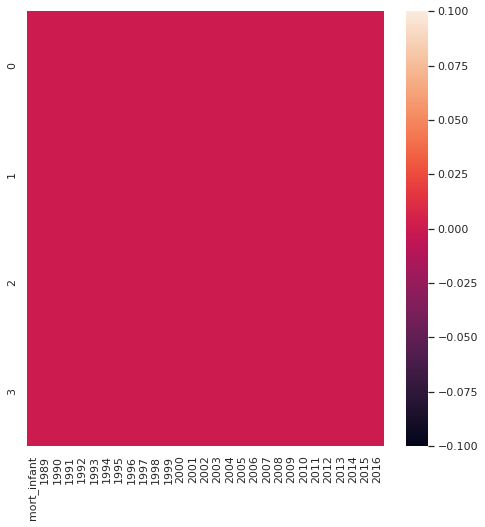

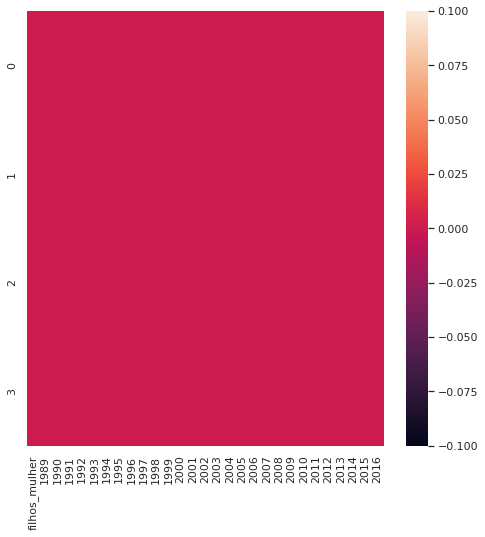

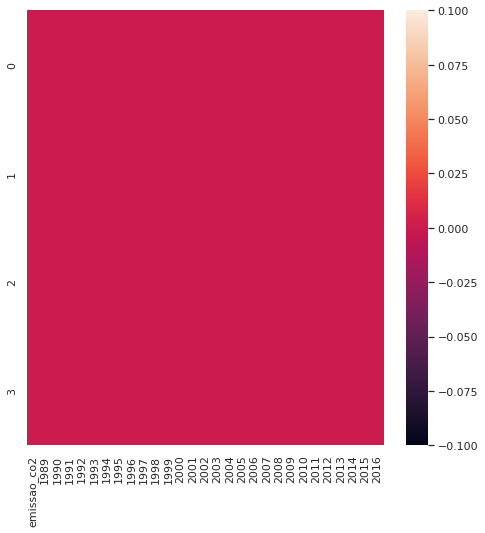

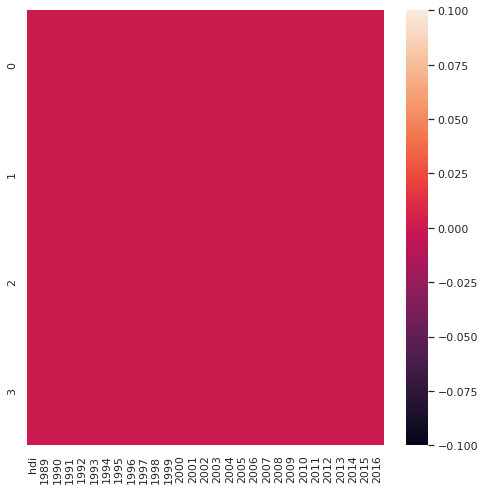

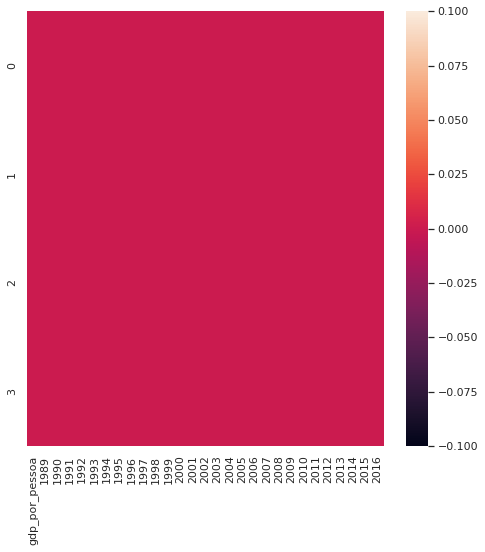

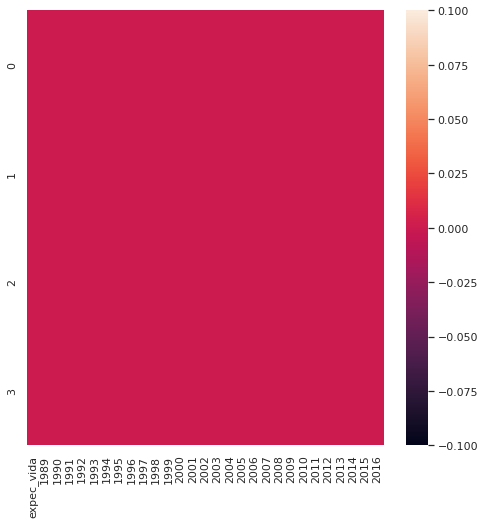

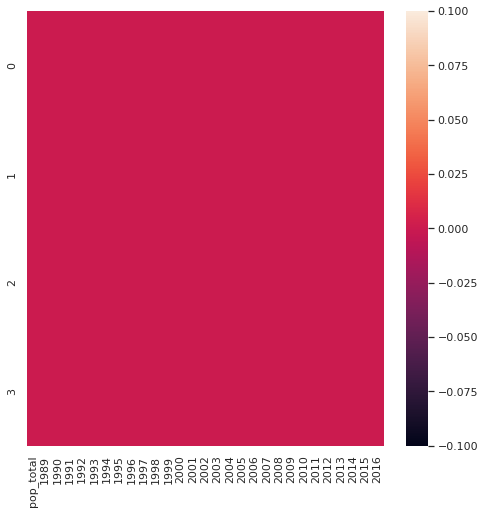

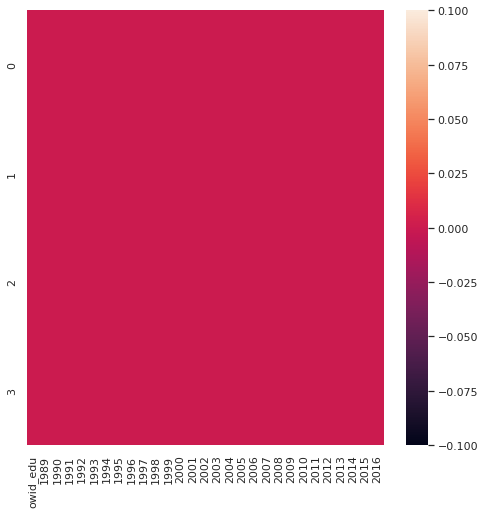

In [21]:
#Vamos verificar se existe valores nulos dentro dos nossos dataframes da lista_bric
#Não temos nenhum valor nulo!
for i in lista_ajustada_data_bric:
  plt.figure(figsize=(8,8))
  sns.heatmap(i.isnull())




In [22]:
#lista_ajustada_data_bric

#Vamos utilizar o loop para ajusta os dfs e aproveitar para renomear as colunas e ajustar a coluna year que esta como str, vamos deixa-la como int!

for i in lista_ajustada_data_bric:
  x = 0  
  df1 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'mort_infant')
  df1.columns = ['country', 'year', 'mort_infant']
  df1['year'] = pd.to_numeric(df1['year'])
  x += 1
  df2 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'filhos_mulher')
  df2.columns = ['country', 'year', 'filhos_mulher']
  df2['year'] = pd.to_numeric(df2['year'])
  x += 1
  df3 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'emissao_co2')
  df3.columns = ['country', 'year', 'emissao_co2']
  df3['year'] = pd.to_numeric(df3['year'])
  x += 1
  df4 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'hdi')
  df4.columns = ['country', 'year', 'hdi']
  df4['year'] = pd.to_numeric(df4['year'])
  x += 1
  df5 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'gdp_por_pessoa')
  df5.columns = ['country', 'year', 'gdp_por_pessoa']
  df5['year'] = pd.to_numeric(df5['year'])
  x += 1
  df6 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'expec_vida')
  df6.columns = ['country', 'year', 'expec_vida']
  df6['year'] = pd.to_numeric(df6['year'])
  x += 1
  df7 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'pop_total')
  df7.columns = ['country', 'year', 'pop_total']
  df7['year'] = pd.to_numeric(df7['year'])
  x += 1
  df8 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'owid_edu')
  df8.columns = ['country', 'year', 'owid_edu']
  df8['year'] = pd.to_numeric(df8['year'])
  

In [23]:
#Vamos dar merge em nossos DFS para criar um unico!

#Primeiro vamos criar dfs auxiliares que são o merge do 1 e n, 1+1 e n-1, 1+1+1 e n-1-1.
#- lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
new_df1 = pd.merge(df1, df8, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df2 = pd.merge(df2, df7, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df3 = pd.merge(df3, df6, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df4 = pd.merge(df4, df5, how='inner', left_on=['year','country'], right_on=['year','country'])

#Vamos criar mais 2 merges auxiliares!
# - lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
merge_1 = pd.merge(new_df1, new_df2, how='inner', left_on=['year','country'], right_on=['year','country'])
merge_2 = pd.merge(new_df3, new_df4, how='inner', left_on=['year','country'], right_on=['year','country'])

#Df_final - lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
df_gapminder_bric = pd.merge(merge_1, merge_2, how='inner', left_on=['year','country'], right_on=['year','country'])
df_gapminder_bric

,country,year,mort_infant,owid_edu,filhos_mulher,pop_total,emissao_co2,expec_vida,hdi,gdp_por_pessoa
0,Brazil,1989,63.00,26.9,2.81,149000000,1.390,67.3,0.613,10500
1,China,1989,53.70,35.6,2.35,1180000000,2.060,68.1,0.501,1420
2,India,1989,126.00,19.7,4.05,873000000,0.707,59.6,0.431,1810
3,Russia,1989,21.60,59.4,1.89,148000000,17.100,69.5,0.734,21500
4,Brazil,1990,60.20,26.0,2.72,152000000,1.430,67.9,0.620,10500
...,...,...,...,...,...,...,...,...,...,...
107,Russia,2015,8.02,80.0,1.75,145000000,11.100,72.0,0.817,25600
108,Brazil,2016,14.80,52.0,1.71,208000000,2.230,75.4,0.760,14500
109,China,2016,9.23,52.0,1.63,1420000000,6.930,77.2,0.753,14300
110,India,2016,38.70,42.7,2.30,1340000000,1.840,70.3,0.643,6190


In [24]:
#Vamos verificar o shape da nossa nova tabela
print("*"*50)
print("\n")
print("Vamos verificar os types das nossas colunas")
print(df_gapminder_bric.dtypes)
print("\n")
print("*"*50)
print("\n")
print("Vamos verificar a qntd de linhas e colunas do novo df:")
print(df_gapminder_bric.shape)
print("\n")
print("*"*50)
print("\n")
print('Temos um total de 112 linhas e 10 colunas!')
print("\n")
print("*"*50)


**************************************************


Vamos verificar os types das nossas colunas
country            object
year                int64
mort_infant       float64
owid_edu          float64
filhos_mulher     float64
pop_total          object
emissao_co2       float64
expec_vida        float64
hdi               float64
gdp_por_pessoa     object
dtype: object


**************************************************


Vamos verificar a qntd de linhas e colunas do novo df:
(112, 10)


**************************************************


Temos um total de 112 linhas e 10 colunas!


**************************************************


**************************************************


Conclusão: Não temos nenhum NAN


**************************************************


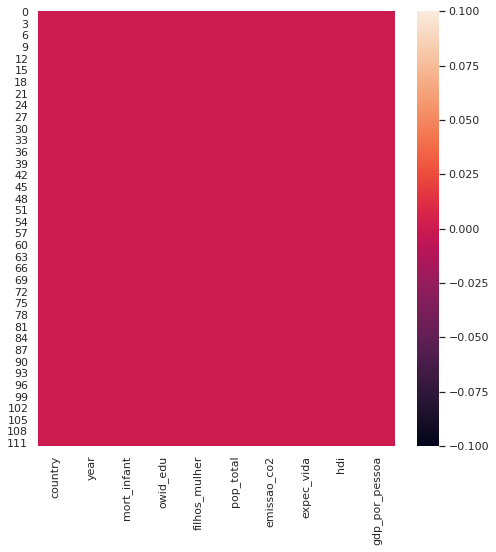

In [25]:
#Vamos verificar a existência de algum Nulo nesse novo DF.
plt.figure(figsize=(8,8))
sns.heatmap(df_gapminder_bric.isnull())

print("*"*50)
print("\n")
print("Conclusão: Não temos nenhum NAN")
print("\n")
print("*"*50)

# Análise dos Dados


## Estrutura dos Dados

Descreva resumidamente a estrutura dos dados.

In [26]:
df_gapminder_bric

,country,year,mort_infant,owid_edu,filhos_mulher,pop_total,emissao_co2,expec_vida,hdi,gdp_por_pessoa
0,Brazil,1989,63.00,26.9,2.81,149000000,1.390,67.3,0.613,10500
1,China,1989,53.70,35.6,2.35,1180000000,2.060,68.1,0.501,1420
2,India,1989,126.00,19.7,4.05,873000000,0.707,59.6,0.431,1810
3,Russia,1989,21.60,59.4,1.89,148000000,17.100,69.5,0.734,21500
4,Brazil,1990,60.20,26.0,2.72,152000000,1.430,67.9,0.620,10500
...,...,...,...,...,...,...,...,...,...,...
107,Russia,2015,8.02,80.0,1.75,145000000,11.100,72.0,0.817,25600
108,Brazil,2016,14.80,52.0,1.71,208000000,2.230,75.4,0.760,14500
109,China,2016,9.23,52.0,1.63,1420000000,6.930,77.2,0.753,14300
110,India,2016,38.70,42.7,2.30,1340000000,1.840,70.3,0.643,6190


**************************************************


Conclusão: Não temos nenhum NAN


**************************************************


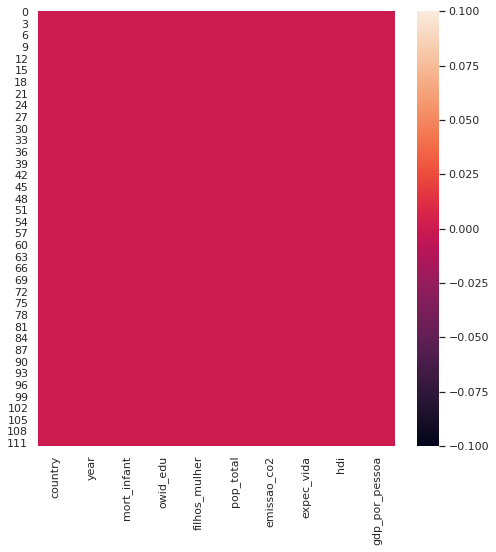

In [27]:
#Vamos verificar a existência de algum Nulo nesse novo DF.
plt.figure(figsize=(8,8))
sns.heatmap(df_gapminder_bric.isnull())

print("*"*50)
print("\n")
print("Conclusão: Não temos nenhum NAN")
print("\n")
print("*"*50)

In [28]:
#Vamos verificar o shape e os tipos dos dados da nossa nova tabela
print("*"*50)
print("\n")
print("Vamos verificar os types das nossas colunas")
print(df_gapminder_bric.dtypes)
print("\n")
print("*"*50)
print("\n")
print("Vamos verificar a qntd de linhas e colunas do novo df:")
print(df_gapminder_bric.shape)
print("\n")
print("*"*50)
print("\n")
print('Temos um total de 112 linhas e 10 colunas!')
print("\n")
print("*"*50)


**************************************************


Vamos verificar os types das nossas colunas
country            object
year                int64
mort_infant       float64
owid_edu          float64
filhos_mulher     float64
pop_total          object
emissao_co2       float64
expec_vida        float64
hdi               float64
gdp_por_pessoa     object
dtype: object


**************************************************


Vamos verificar a qntd de linhas e colunas do novo df:
(112, 10)


**************************************************


Temos um total de 112 linhas e 10 colunas!


**************************************************


In [29]:
#Descobrimos quue nosso pop_total e gdp_por_essoa são do tipo object, sendo assim não seriam amparados em análises de correlação.
#Vamos ajustar!

df_gapminder_bric['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_bric['gdp_por_pessoa'], errors='coerce')
df_gapminder_bric.reset_index(drop=True,inplace=True)



df_gapminder_bric['pop_total'] = pd.to_numeric(df_gapminder_bric['pop_total'], errors='coerce')
df_gapminder_bric.reset_index(drop=True,inplace=True)



## Análise (pergunta) 1.

*# Questão 1: Algum dos paises do BRIC esta crescendo mais em termos de GDP que os outros?**

**Resposta no código!**

In [30]:
#@markdown ---
#@title Q1. Aponte os principais recursos empregados nesta pergunta aqui:

Q1a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q1b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q1c = "Selecao de dados multicondicional" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q1d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q1e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q1f = "" #@param {type:"string"}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

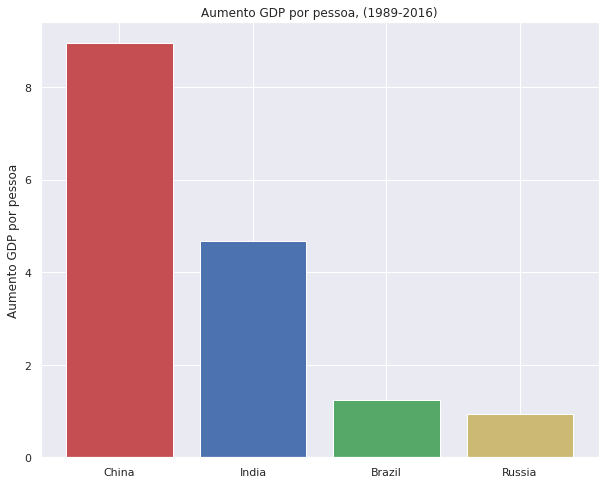

In [31]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')




lista_gapminder_bric = [df_gapminder_br, df_gapminder_ch, df_gapminder_in, df_gapminder_ru]






china_pc_crescimento = df_gapminder_ch['gdp_por_pessoa'] = df_gapminder_ch.groupby('country')['gdp_por_pessoa'].pct_change() * 100
india_pc_crescimento = df_gapminder_in['gdp_por_pessoa'] = df_gapminder_in.groupby('country')['gdp_por_pessoa'].pct_change() * 100
brazil_pc_crescimento = df_gapminder_br['gdp_por_pessoa'] = df_gapminder_br.groupby('country')['gdp_por_pessoa'].pct_change() * 100
russia_pc_crescimento = df_gapminder_ru['gdp_por_pessoa'] = df_gapminder_ru.groupby('country')['gdp_por_pessoa'].pct_change() * 100

taxa_crescimento = china_pc_crescimento.mean(), india_pc_crescimento.mean(), brazil_pc_crescimento.mean(), russia_pc_crescimento.mean()
paises = ['China', 'India', 'Brazil','Russia'] 

plt.rcParams['figure.figsize'] = 10,8 
plt.bar(x= paises, height= taxa_crescimento, color=['r','b','g','y'])
plt.ylabel('Aumento GDP por pessoa')
plt.title('Aumento GDP por pessoa, (1989-2016)')
plt.show()

In [32]:
comentario = "A China teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 8,95% a.a"
comentario2 = "Enquanto a Russia nesse mesmo período principalmente por questões politicas teve um aumento de apenas 0,90% a.a"
comentario3 = "A China como potencial mundial vem liderando o BRIC em PIB"

print("O Aumento do GDP da China anualmente para o período de 1989-2016 foi de : {}".format(china_pc_crescimento.mean()))
print("O Aumento do GDP da India anualmente para o período de 1989-2016 foi de : {}".format(india_pc_crescimento.mean()))
print("O Aumento do GDP do Brasil anualmente para o período de 1989-2016 foi de : {}".format(brazil_pc_crescimento.mean()))
print("O Aumento do GDP da Russia anualmente para o período de 1989-2016 foi de : {}".format(russia_pc_crescimento.mean()))
print("*"*50)
print(comentario)
print(comentario2)
print(comentario3)

O Aumento do GDP da China anualmente para o período de 1989-2016 foi de : 8.950572971873468
O Aumento do GDP da India anualmente para o período de 1989-2016 foi de : 4.680200857165439
O Aumento do GDP do Brasil anualmente para o período de 1989-2016 foi de : 1.2341010235076306
O Aumento do GDP da Russia anualmente para o período de 1989-2016 foi de : 0.9327167408662506
**************************************************
A China teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 8,95% a.a
Enquanto a Russia nesse mesmo período principalmente por questões politicas teve um aumento de apenas 0,90% a.a
A China como potencial mundial vem liderando o BRIC em PIB


## Análise (pergunta) 2.

# Questão 2: Correlação dos indicadores - China
## Maior Crescimento PIB

In [33]:
#@markdown ---
#@title Q2. Aponte os principais recursos empregados nesta pergunta aqui:

Q2a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q2b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q2c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q2d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q2e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q2f = "" #@param {type:"string"}


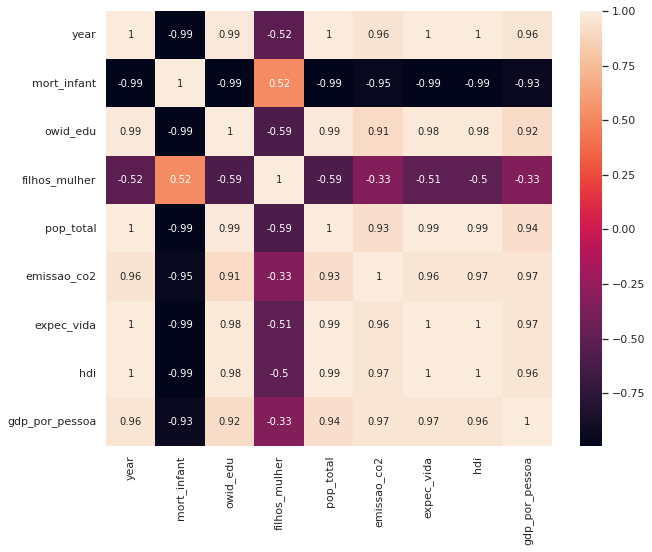

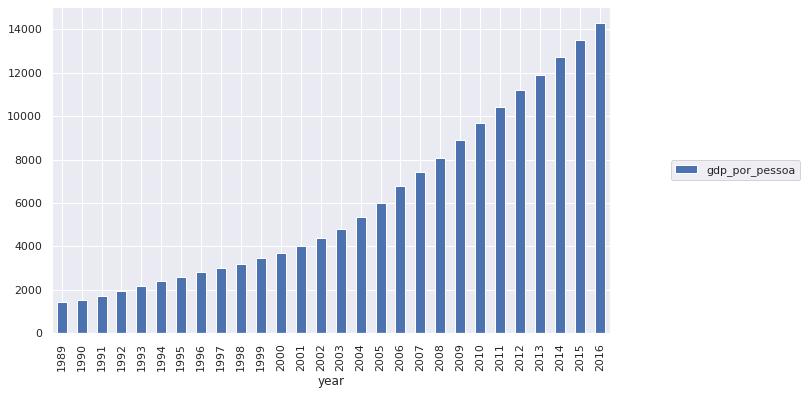

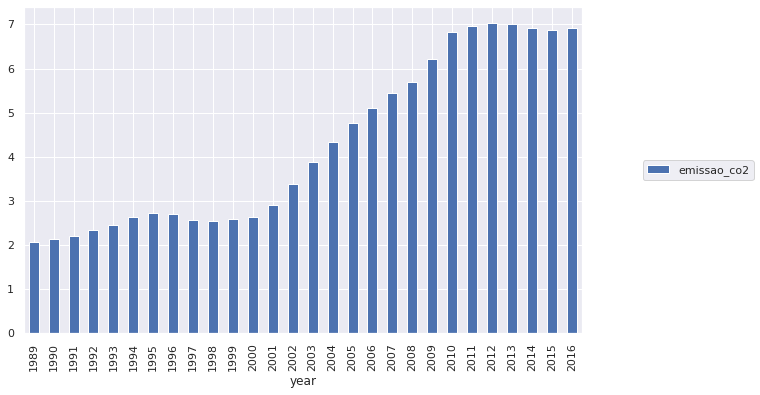

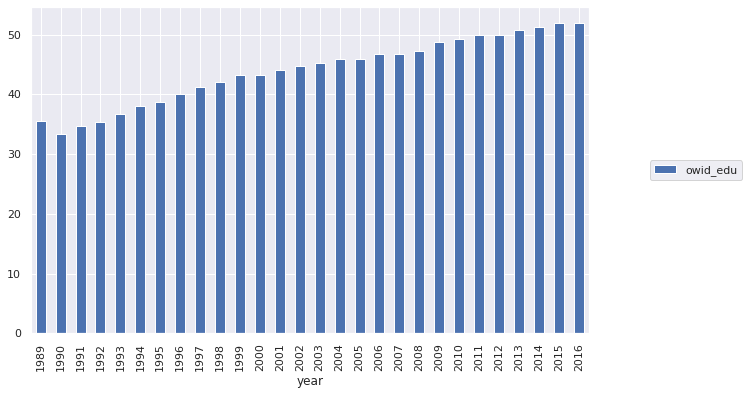



***************************************************************************************************************************************************************************************************

 De primeira vista, é visivel que os principais indicadores ligados a crescimento IDH,PIB e qualidade de vida estão melhorando ao longo do tempo.

 A partir da análise de correlação na China para os indicadores trabalhados, podemos concluir que ao passar do tempo(1989~2016), tivemos uma correlação positiva em praticamente todos os
indicadores de qualidade de vida, educação, PIB e também infelizmente da emissão de CO2.
 E possui correlação negativa com indcadores de mortalidade infantil e também filhos por cada mulher, no entanto vale entender que na China existe um caso atípico de Lei sobre limite de filhos
por casal que foi implantada na década de 70, ponto que favorece nessa correlação negativa.

 Com essas informações, podemos concluir que a China esta em  crescimento - ponto observavel 

In [34]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')



# China Correlação de indicadores

china_corr = df_gapminder_ch.corr()

sns.heatmap(china_corr, 
            xticklabels=china_corr.columns.values,
            yticklabels=china_corr.columns.values, annot=True)



gdp_ch = pd.DataFrame(df_gapminder_ch[['country','year','gdp_por_pessoa']])
co2_ch =  pd.DataFrame(df_gapminder_ch[['country','year','emissao_co2']])
owid_ch =  pd.DataFrame(df_gapminder_ch[['country','year','owid_edu']])

teste = gdp_ch.set_index(gdp_ch.columns[0])
a = teste.plot(x='year', y = 'gdp_por_pessoa', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = co2_ch.set_index(co2_ch.columns[0])
a = teste.plot(x='year', y = 'emissao_co2', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = owid_ch.set_index(owid_ch.columns[0])
a = teste.plot(x='year', y = 'owid_edu', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()



#0.7 a 0.9 positivo ou negativo indica uma correlação forte. 
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
print("\n")
print("*"*195)
print("""
 De primeira vista, é visivel que os principais indicadores ligados a crescimento IDH,PIB e qualidade de vida estão melhorando ao longo do tempo.

 A partir da análise de correlação na China para os indicadores trabalhados, podemos concluir que ao passar do tempo(1989~2016), tivemos uma correlação positiva em praticamente todos os
indicadores de qualidade de vida, educação, PIB e também infelizmente da emissão de CO2.
 E possui correlação negativa com indcadores de mortalidade infantil e também filhos por cada mulher, no entanto vale entender que na China existe um caso atípico de Lei sobre limite de filhos
por casal que foi implantada na década de 70, ponto que favorece nessa correlação negativa.

 Com essas informações, podemos concluir que a China esta em  crescimento - ponto observavel quando olhamos sua curva de crescimento GDP(PIB) ao longo do tempo e 
sua relação com outros indicadores,  apresentando uma melhora:  na educação(OWID), qualidade de vida(HDI, expectativa de vida, diminuição da mortalidade infantil) de sua população. 
 
 No entanto,  também apresenta um crescimento na emissão de CO2,
ponto justificado pelo rápido crescimento de industrialização nos ultimos anos e também pelo uso intenso de usinas termoelétricas como matriz enérgetica.""")

print("\n")
print("*"*195)


## Análise (pergunta) 3.

# Questão 3: Correlação dos Indicadores - Russia
## Pior Crescimento PIB

In [35]:
#@markdown ---
#@title Q3. Aponte os principais recursos empregados nesta pergunta aqui:

Q3a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q3b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q3c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q3d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q3e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q3f = "" #@param {type:"string"}


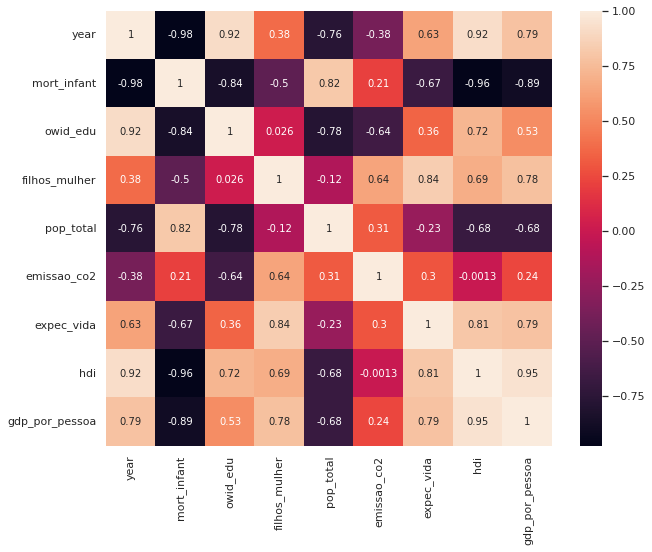

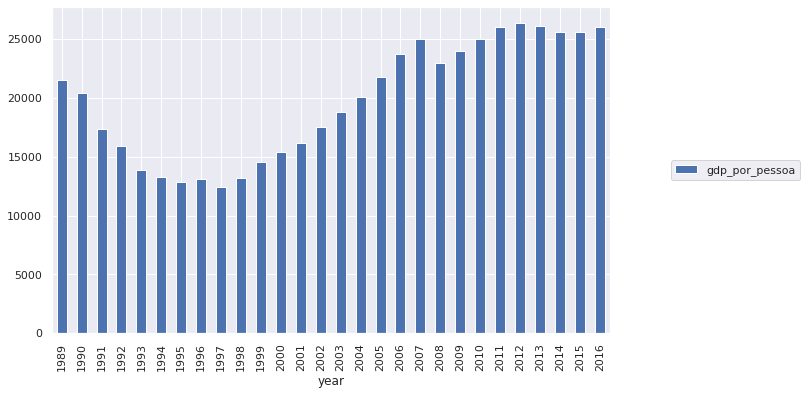

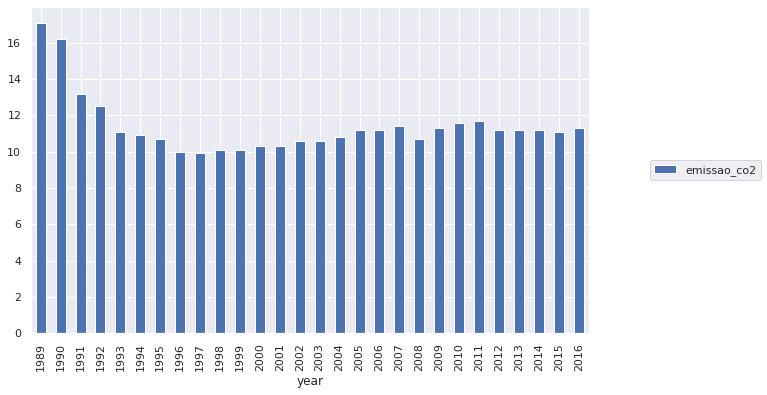

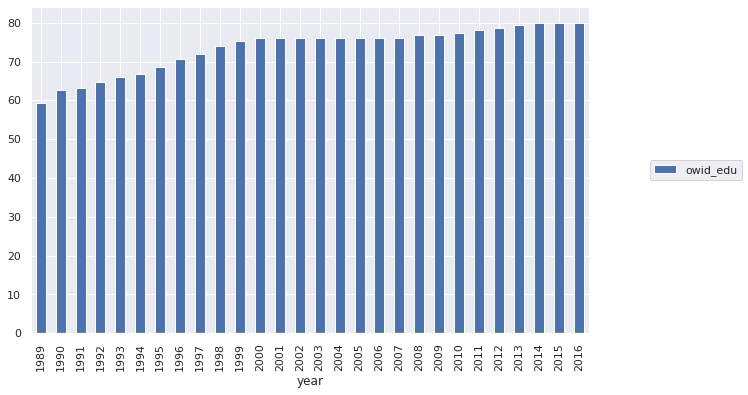



***************************************************************************************************************************************************************************************************

  Para o caso da Russia, podemos ver diversas correlações moderadas ou fracas, principalmente em alguns indicadores de crescimento, ponto justificável principalmente pelo fato da Russia
  Ser o pior país do BRIC em crescimento PIB a.a.

  Mas podemos pontuar algumas questões:  GDP russo em 1989 até 1997 em queda, pode se dar pelo fim da Guerra Fria que foi em 3 de dezembro de 1989.
  Sendo que sua curva volta a crescer com a chegada das oligarquias russas no seu auge em 1996, durante o governo de Boris Yeltsin.
  E escalando ainda mais a partir do começo dos anos 2000, quando Yeltsin renunciou e Vladimir Putin assumiu interinamente a presidência da Federação Russa.

 
  
  No entanto é factivel dizer que a Russia, ao longo do tempo - possui um crescimento de seu GDP, mas com menor inclinaçã

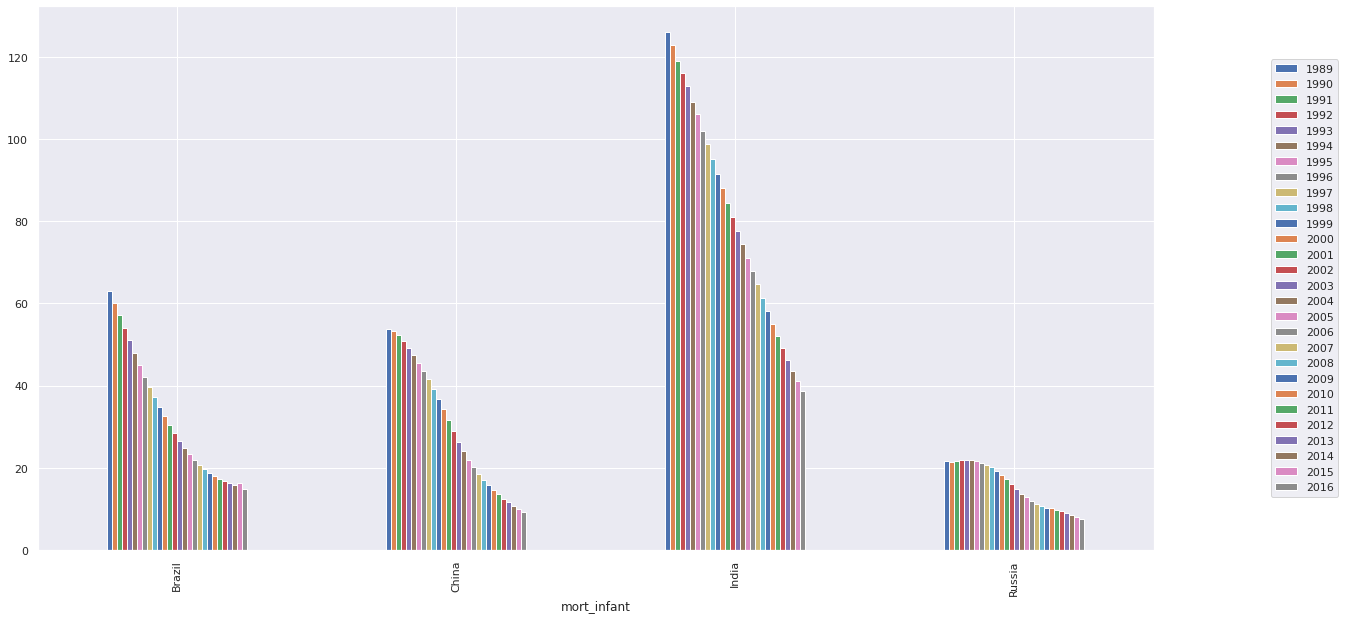

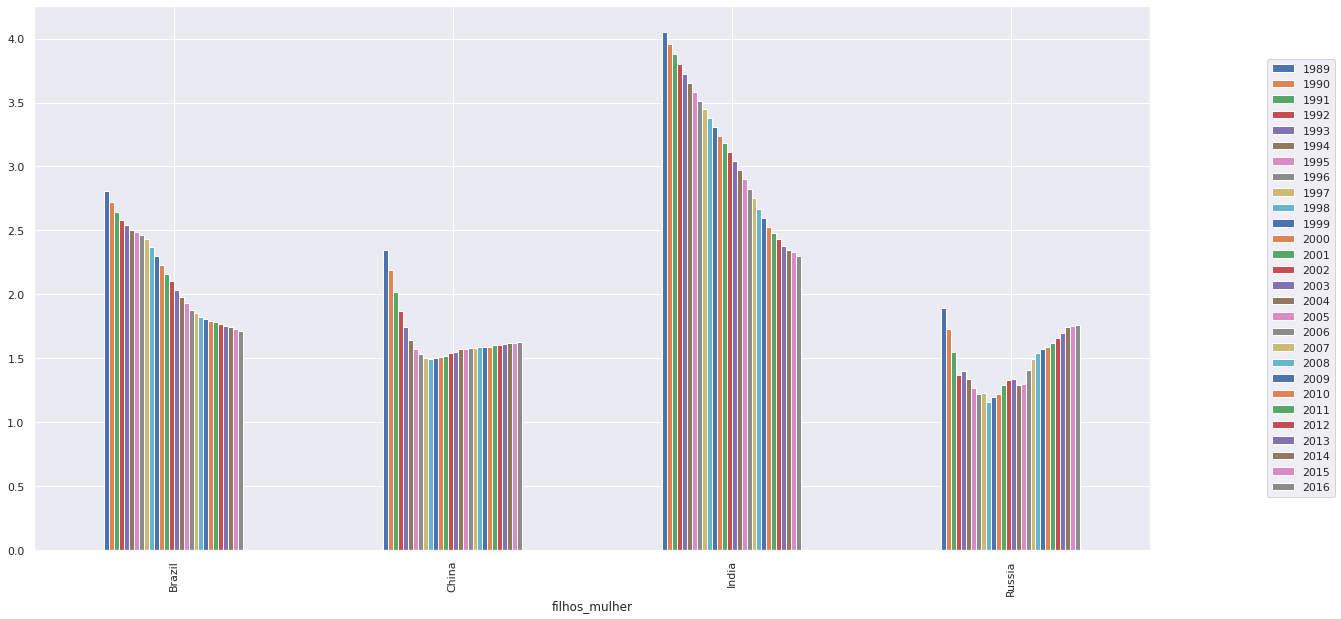

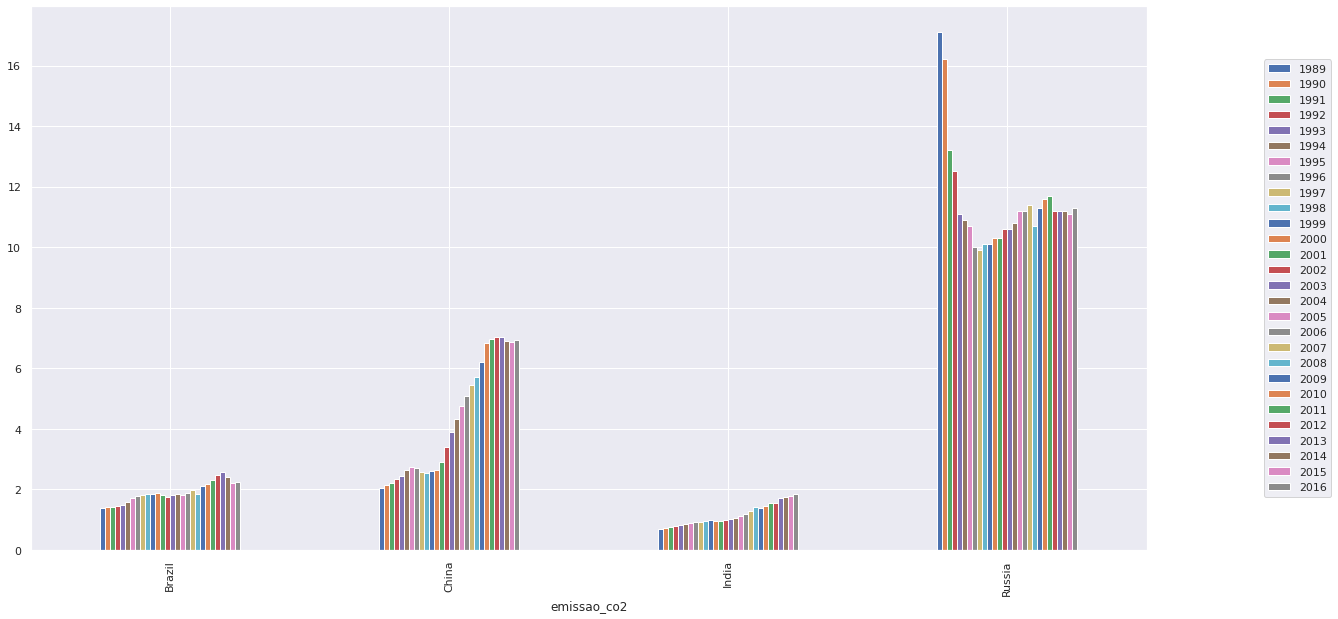

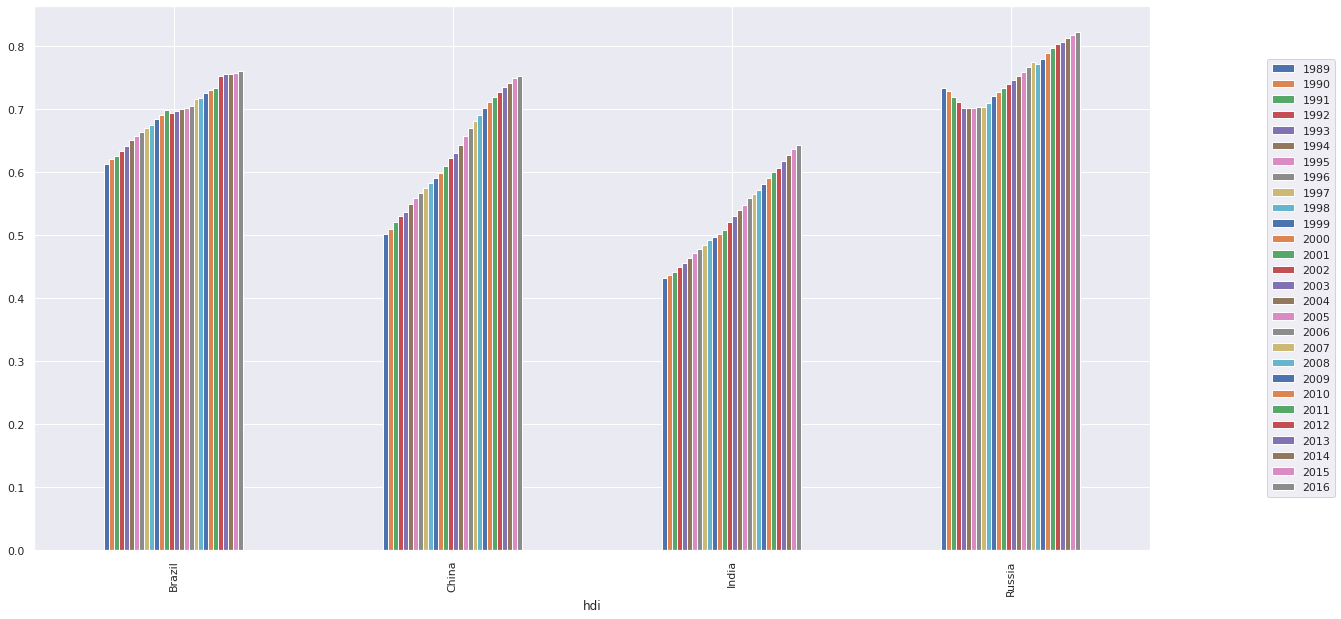

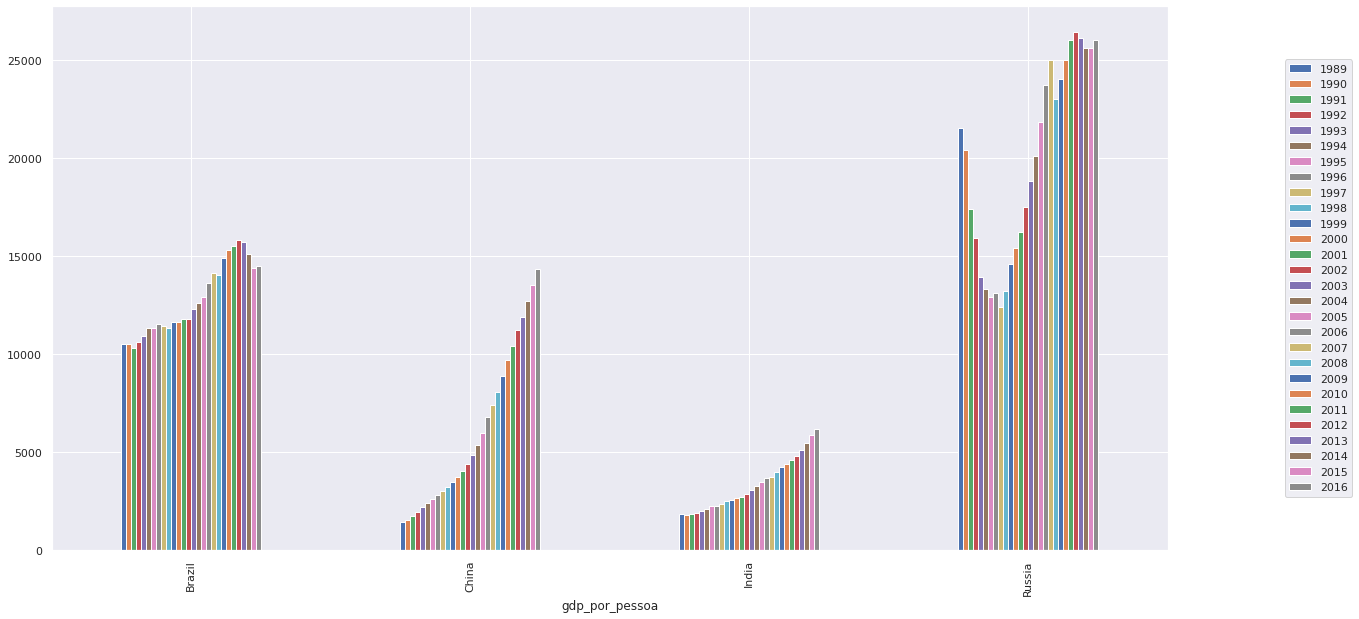

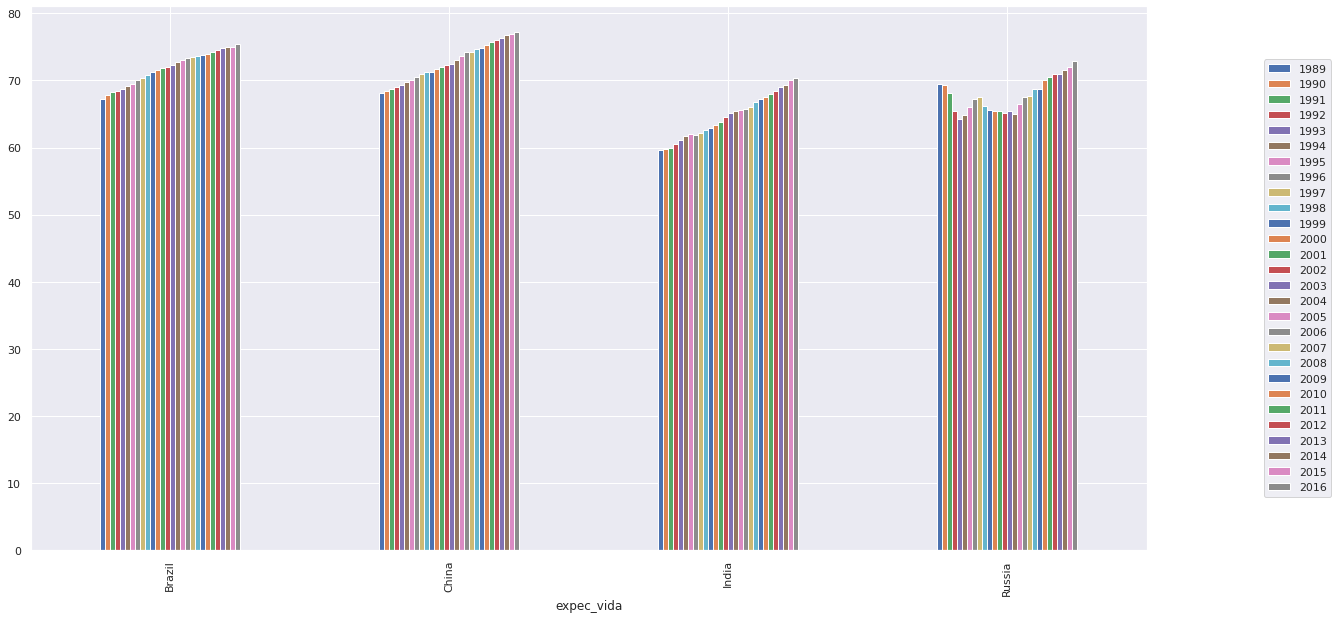

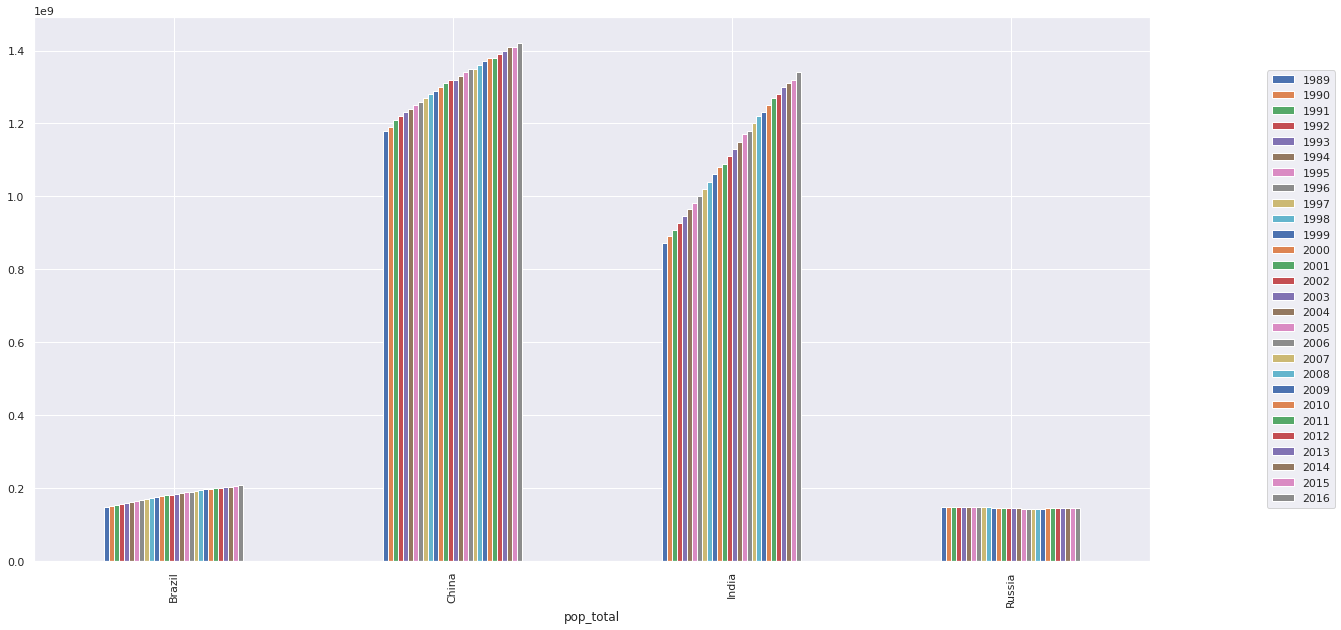

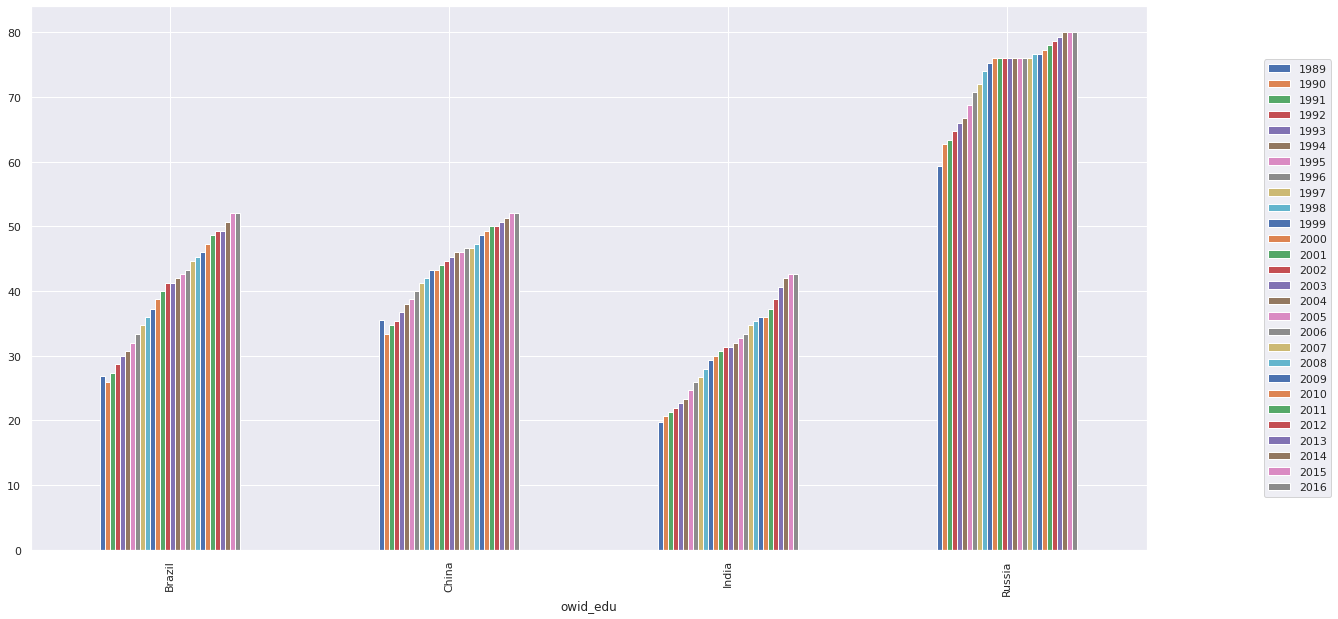

In [36]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')



ru_corr = df_gapminder_ru.corr()

sns.heatmap(ru_corr, 
            xticklabels=ru_corr.columns.values,
            yticklabels=ru_corr.columns.values, annot=True)


gdp_ru = pd.DataFrame(df_gapminder_ru[['country','year','gdp_por_pessoa']])
co2_ru =  pd.DataFrame(df_gapminder_ru[['country','year','emissao_co2']])
owid_ru =  pd.DataFrame(df_gapminder_ru[['country','year','owid_edu']])

teste = gdp_ru.set_index(gdp_ru.columns[0])
a = teste.plot(x='year', y = 'gdp_por_pessoa', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = co2_ru.set_index(co2_ru.columns[0])
a = teste.plot(x='year', y = 'emissao_co2', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = owid_ru.set_index(owid_ru.columns[0])
a = teste.plot(x='year', y = 'owid_edu', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()



#0.7 a 0.9 positivo ou negativo indica uma correlação forte. 
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

print("\n")
print("*"*195)
print("""
  Para o caso da Russia, podemos ver diversas correlações moderadas ou fracas, principalmente em alguns indicadores de crescimento, ponto justificável principalmente pelo fato da Russia
  Ser o pior país do BRIC em crescimento PIB a.a.

  Mas podemos pontuar algumas questões:  GDP russo em 1989 até 1997 em queda, pode se dar pelo fim da Guerra Fria que foi em 3 de dezembro de 1989.
  Sendo que sua curva volta a crescer com a chegada das oligarquias russas no seu auge em 1996, durante o governo de Boris Yeltsin.
  E escalando ainda mais a partir do começo dos anos 2000, quando Yeltsin renunciou e Vladimir Putin assumiu interinamente a presidência da Federação Russa.

 
  
  No entanto é factivel dizer que a Russia, ao longo do tempo - possui um crescimento de seu GDP, mas com menor inclinação que sua vizinha China.
   Outro ponto a ser observado, é diferentemente de outros paises do BRIC - a Russia era uma potencia mundial antes da data estudada de 1989 - fazendo com que alguns dos seus indicadores
  na verdade, tenham redução ao longo do tempo como é o caso de emissão de CO2 
  ou a largada em 1989 já possuam valores de bem acima da média dos outros países do BRIC para a mesma data de referência - ponto que pode ser observado no gráfico a seguir, principalmente quando se trata em educação:

""")

print("\n")
print("*"*195)

x=0
for i in lista_ajustada_data_bric:
  teste = lista_ajustada_data_bric[x].set_index(lista_ajustada_data_bric[x].columns[0])
  a = teste.plot(kind='bar',figsize=(20,10))
  a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
  plt.show()
  x += 1

## Análise (pergunta) 4.

#Questão 4: Como o Brasil esta em relação aos outros países do BRIC em termos de educação? - OWID

**Resposta no código!!**

In [37]:
#@markdown ---
#@title Q4. Aponte os principais recursos empregados nesta pergunta aqui:

Q4a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q4b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q4c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q4d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q4e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q4f = "" #@param {type:"string"}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

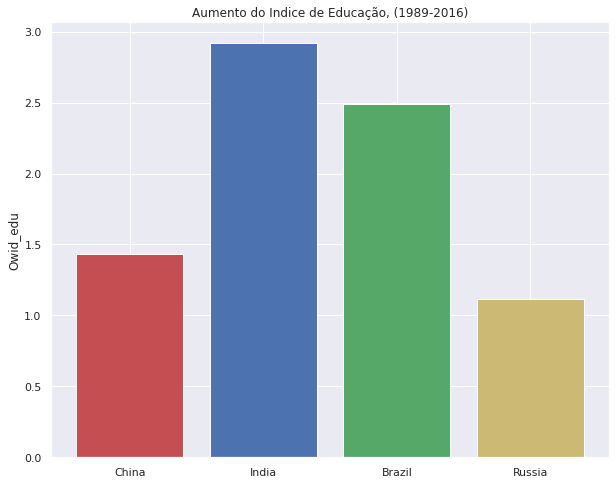

In [38]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')



#owid_br =  pd.DataFrame(df_gapminder_br[['country','year','owid_edu']])
#owid_ch =  pd.DataFrame(df_gapminder_ch[['country','year','owid_edu']])
#owid_in =  pd.DataFrame(df_gapminder_in[['country','year','owid_edu']])
#owid_ru =  pd.DataFrame(df_gapminder_ru[['country','year','owid_edu']])


owid_ch = df_gapminder_ch['owid_edu'] = df_gapminder_ch.groupby('country')['owid_edu'].pct_change() * 100
owid_in = df_gapminder_in['owid_edu'] = df_gapminder_in.groupby('country')['owid_edu'].pct_change() * 100
owid_br = df_gapminder_br['owid_edu'] = df_gapminder_br.groupby('country')['owid_edu'].pct_change() * 100
owid_ru = df_gapminder_ru['owid_edu'] = df_gapminder_ru.groupby('country')['owid_edu'].pct_change() * 100

taxa_crescimento = owid_ch.mean(), owid_in.mean(), owid_br.mean(), owid_ru.mean()
paises = ['China', 'India', 'Brazil','Russia'] 

plt.rcParams['figure.figsize'] = 10,8 
plt.bar(x= paises, height= taxa_crescimento, color=['r','b','g','y'])
plt.ylabel('Owid_edu')
plt.title('Aumento do Indice de Educação, (1989-2016)')
plt.show()

In [39]:
comentario = "A India teve o maior crescimento em anos de estudo durante o período, com um total de 2,91% a.a"
comentario2 = "Enquanto a Russia nesse mesmo período teve apenas um crescimento de 1,11%"
comentario3 = "O Brasil esta na vice-liderança, com um crescimento de 2,48% a.a "

print("O Aumento do OWID da China anualmente para o período de 1989-2016 foi de : {}".format(owid_ch.mean()))
print("O Aumento do OWID da India anualmente para o período de 1989-2016 foi de : {}".format(owid_in.mean()))
print("O Aumento do OWID do Brasil anualmente para o período de 1989-2016 foi de : {}".format(owid_br.mean()))
print("O Aumento do OWID da Russia anualmente para o período de 1989-2016 foi de : {}".format(owid_ru.mean()))
print("*"*50)
print(comentario)
print(comentario2)
print(comentario3)

O Aumento do OWID da China anualmente para o período de 1989-2016 foi de : 1.4327264263921136
O Aumento do OWID da India anualmente para o período de 1989-2016 foi de : 2.918777256887902
O Aumento do OWID do Brasil anualmente para o período de 1989-2016 foi de : 2.488001162312216
O Aumento do OWID da Russia anualmente para o período de 1989-2016 foi de : 1.116967017209503
**************************************************
A India teve o maior crescimento em anos de estudo durante o período, com um total de 2,91% a.a
Enquanto a Russia nesse mesmo período teve apenas um crescimento de 1,11%
O Brasil esta na vice-liderança, com um crescimento de 2,48% a.a 


## Análise (pergunta) 5.

**Entre os motoristas envolvidos em acidentes quais apresentam maior dispersão de idade, homens ou mulheres?**

**...**. ...

In [40]:
#@markdown ---
#@title Q5. Aponte os principais recursos empregados nesta pergunta aqui:

Q5a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q5b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q5c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q5d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q5e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q5f = "" #@param {type:"string"}

In [41]:
# Seu código

## Análise (pergunta) 6.

**A soma das despesas da administradora da Rodovia com acidentes fatais é inferior às despesas com os demais acidentes?**

**...**. ...

In [42]:
#@markdown ---
#@title Q6. Aponte os principais recursos empregados nesta pergunta aqui:

Q6a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q6b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q6c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q6d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q6e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q6f = "" #@param {type:"string"}


In [43]:
# Seu código

# Conclusão

Com base nas suas análises o que você conclui? Essa é uma parte importante do seu trabalho. A análise de dados busca identificar aspectos e confirmar hipóteses sobre o dados para a tomada de decisões. Por exemplo, se em uma análise você chega a conclusão, a partir dos dados, que no período da noite existem mais acidentes fatais por excesso de velocidade, você pode propor aumentar o pedágio ou intensificar a fiscalização nesse horário. Ou em uma base de salários, se você identifica menores salários para as mulheres na empresa, por propor mudanças no recrutamento. Assim, não deixe de incluir nas suas conclusões recomendações ou decisões que você tomaria com base em suas análises e que resultados esperaria alcançar. Justifique, em todos os casos as suas conclusões.

---

In [44]:
#@markdown ---
#@title Notas
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema. 
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva 
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário 
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
Proporcoes dos dados
Combinacao de dados (merge, join, concat)
Selecao de dados multicondicional
Quantidades e Proporcoes (bar, pizza)
Ornamentos (cores, markers etc.)

*** Questão:  2
None
None
None
None
None

*** Questão:  3
None
None
None
None
None

*** Questão:  4
None
None
None
None
None

*** Questão:  5
None
None
None
None
None

*** Questão:  6
None
None
None
None
None



In [45]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao 
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus  

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 7.90
